In [176]:
import itertools
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from collections import Counter
import pprint

#Method 1

In this part, we consider the neighbors of each node as its weight as a susceptible node.

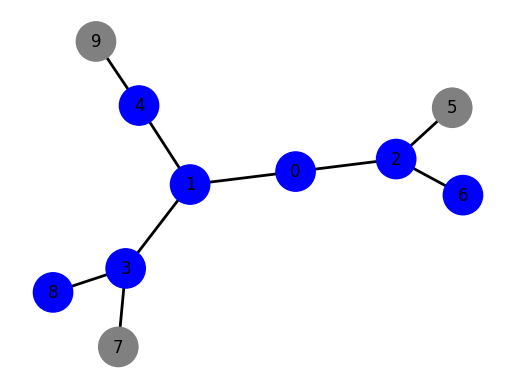

In [177]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty tree graph
G = nx.Graph()

# Add 10 nodes to the graph
G.add_nodes_from(range(10))

# Connect the nodes in a tree structure
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9)])

# Set the node colors
node_colors = ['blue' if i in [0,1,2,3,4, 6, 8] else 'gray' for i in range(10)]

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in range(10)}, font_size=12)
nx.draw_networkx_edges(G, pos, width=2)
plt.axis('off')
plt.show()

In [178]:
class Node:
    def __init__(self, value, children=None):
        self.value = value
        self.children = [] if children is None else children
     

In [179]:
import random

# Initialize infected nodes with the root node
root_node = 2
infected_nodes = [root_node]
infection_sequence = infected_nodes.copy()

# Repeat until no more nodes can be infected
while True:
    # Calculate weights for susceptible neighbors of infected nodes
    weights = [0] * len(G.nodes)
    for i, node in enumerate(G.nodes):
        if node not in infected_nodes and node_colors[node] == 'blue':
            for neighbor in G.neighbors(node):
              if node_colors[neighbor] == 'blue':
                weights[i] = 1 
            
    # Exclude nodes that have already been infected
    weights = [weights[i] if node_colors[i] == 'blue' else 0 for i in range(len(G.nodes))]
    print(f"weights are {weights}.")
    # Normalize weights
    total_weight = sum(weights)
    
    #print(total_weight)
    if total_weight == 0:
        break
    weights = [w/total_weight for w in weights]
    print(f"weights is {weights}")
    # Sample a susceptible node based on its weight
    selected_node = random.choices(list(G.nodes), weights=weights)[0]
    
    # Add the selected node to the list of infected nodes
    infected_nodes.append(selected_node)
    infection_sequence.append(selected_node)

# Return the list of infected nodes
print(f"infection_sequence is {infection_sequence}.")

weights are [1, 1, 0, 1, 1, 0, 1, 0, 1, 0].
weights is [0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.0, 0.16666666666666666, 0.0]
weights are [1, 1, 0, 0, 1, 0, 1, 0, 1, 0].
weights is [0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.0]
weights are [1, 1, 0, 0, 1, 0, 1, 0, 0, 0].
weights is [0.25, 0.25, 0.0, 0.0, 0.25, 0.0, 0.25, 0.0, 0.0, 0.0]
weights are [1, 0, 0, 0, 1, 0, 1, 0, 0, 0].
weights is [0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0]
weights are [0, 0, 0, 0, 1, 0, 1, 0, 0, 0].
weights is [0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0]
weights are [0, 0, 0, 0, 1, 0, 0, 0, 0, 0].
weights is [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
weights are [0, 0, 0, 0, 0, 0, 0, 0, 0, 0].
infection_sequence is [2, 3, 8, 1, 0, 6, 4].


In [180]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_random_tree(n_nodes=10):
    # Create an empty tree graph
    G = nx.Graph()

    # Add nodes to the graph
    G.add_nodes_from(range(n_nodes))

    # Connect the nodes in a tree structure
    edges = [(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9)]
    G.add_edges_from(edges)

    # Set the node colors
    node_colors = ['blue' if i in [0,1,2,3,4, 6, 8] else 'gray' for i in range(n_nodes)]

    # Return the graph and node colors
    return G, node_colors

def repeat_infection(n_iterations=1000, n_nodes=10, root_nodes=[0,2]):
    sequences = []
    for i in range(n_iterations):
        # Select a random root node
        root_node = random.choice(root_nodes)

        # Generate a random tree and node colors
        G, node_colors = generate_random_tree(n_nodes)

        # Initialize infected nodes with the root node
        infected_nodes = [root_node]
        infection_sequence = infected_nodes.copy()

        # Repeat until no more nodes can be infected
        while True:
            # Calculate weights for susceptible neighbors of infected nodes
            weights = [0] * len(G.nodes)
            for i, node in enumerate(G.nodes):
                if node not in infected_nodes and node_colors[node] == 'blue':
                    weights[i] = sum(1 for neighbor in G.neighbors(node) if neighbor in infected_nodes and node_colors[neighbor] == 'blue')

            # Exclude nodes that have already been infected
            weights = [weights[i] if i not in infected_nodes else 0 for i in range(len(G.nodes))]

            # Normalize weights
            total_weight = sum(weights)
            if total_weight == 0:
                break
            weights = [w/total_weight for w in weights]

            # Sample a susceptible node based on its weight
            selected_node = random.choices(list(G.nodes), weights=weights)[0]

            # Add the selected node to the list of infected nodes
            infected_nodes.append(selected_node)
            infection_sequence.append(selected_node)

        # Add the infection sequence to the list of all sequences
        sequences.append(infection_sequence)

    # Return the list of infection sequences
    return sequences


In [181]:
sequences = repeat_infection(n_iterations=1000, n_nodes=10, root_nodes=[0,1,2,3,4, 6, 8])


In [182]:
print(sequences[:10])

[[0, 1, 3, 2, 4, 6, 8], [0, 2, 1, 4, 6, 3, 8], [4, 1, 3, 0, 8, 2, 6], [4, 1, 0, 3, 8, 2, 6], [1, 4, 0, 3, 8, 2, 6], [3, 1, 8, 0, 4, 2, 6], [6, 2, 0, 1, 4, 3, 8], [1, 3, 8, 0, 4, 2, 6], [8, 3, 1, 4, 0, 2, 6], [1, 0, 4, 2, 6, 3, 8]]


In [183]:
print(len(sequences))

1000


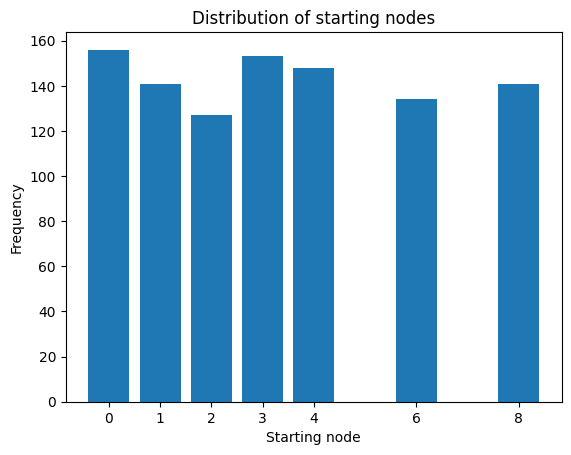

In [184]:
from collections import Counter

# Sort sequences based on their first element
sorted_sequences = sorted(sequences, key=lambda seq: seq[0])

# Count the frequency of each starting node
start_nodes = [seq[0] for seq in sorted_sequences]
node_counts = Counter(start_nodes)

# Count the frequency of each starting node
freq = Counter([seq[0] for seq in sorted_sequences])

# Get all possible first elements
possible_first_elements = sorted(set(seq[0] for seq in sorted_sequences))

# Create a bar chart with xticks for each possible first element
plt.bar(freq.keys(), freq.values())
plt.xlabel("Starting node")
plt.ylabel("Frequency")
plt.title("Distribution of starting nodes")
plt.xticks(possible_first_elements)

plt.show()

## Test on a Bigger Graph

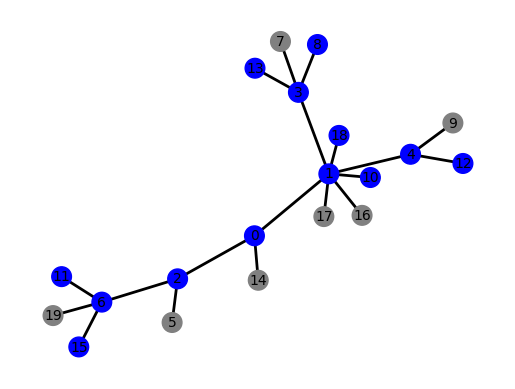

In [185]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty tree graph
G = nx.Graph()

# Add 20 nodes to the graph
G.add_nodes_from(range(20))

# Connect the nodes in a tree structure
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (1, 10), (6, 11), (4,12), (3, 13), (0, 14), (6,15), (1, 16), (1, 17), (1,18), (6, 19)])

# Set the node colors
node_colors = ['blue' if i in [0,1,2,3,4, 6, 8, 10, 11, 12, 13, 15, 18] else 'gray' for i in range(20)]

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200)
nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in range(20)}, font_size=10)
nx.draw_networkx_edges(G, pos, width=2)
plt.axis('off')
plt.show()

In [186]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_random_tree(n_nodes=20):
    # Create an empty tree graph
    G = nx.Graph()

    # Add 20 nodes to the graph
    G.add_nodes_from(range(20))

    # Connect the nodes in a tree structure
    G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (1, 10), (6, 11), (4,12), (3, 13), (0, 14), (6,15), (1, 16), (1, 17), (1,18), (6, 19)])

    # Set the node colors
    node_colors = ['blue' if i in [0,1,2,3,4, 6, 8, 10, 11, 12, 13, 15, 18] else 'gray' for i in range(20)]
    # Return the graph and node colors
    return G, node_colors

def repeat_infection(n_iterations=1000, n_nodes=20, root_nodes=[0]):
    sequences = []
    for i in range(n_iterations):
        # Select a random root node
        root_node = random.choice(root_nodes)

        # Generate a random tree and node colors
        G, node_colors = generate_random_tree(n_nodes)

        # Initialize infected nodes with the root node
        infected_nodes = [root_node]
        infection_sequence = infected_nodes.copy()

        # Repeat until no more nodes can be infected
        while True:
            # Calculate weights for susceptible neighbors of infected nodes
            weights = [0] * len(G.nodes)
            for i, node in enumerate(G.nodes):
                if node not in infected_nodes and node_colors[node] == 'blue':
                    weights[i] = sum(1 for neighbor in G.neighbors(node) if node_colors[neighbor] == 'blue')

            # Exclude nodes that have already been infected
            weights = [weights[i] if i not in infected_nodes else 0 for i in range(len(G.nodes))]

            # Normalize weights
            total_weight = sum(weights)
            if total_weight == 0:
                break
            weights = [w/total_weight for w in weights]

            # Sample a susceptible node based on its weight
            selected_node = random.choices(list(G.nodes), weights=weights)[0]

            # Add the selected node to the list of infected nodes
            infected_nodes.append(selected_node)
            infection_sequence.append(selected_node)

        # Add the infection sequence to the list of all sequences
        sequences.append(infection_sequence)

    # Return the list of infection sequences
    return sequences


In [187]:
sequences = repeat_infection(n_iterations=1500, n_nodes=20, root_nodes=[0,1,2,3,4, 6, 8, 10, 11, 12, 13, 15, 18])
print(sequences[:10])

[[4, 6, 15, 1, 3, 10, 0, 18, 13, 8, 11, 2, 12], [11, 1, 0, 4, 6, 12, 3, 2, 18, 13, 10, 8, 15], [13, 4, 1, 3, 18, 6, 0, 2, 11, 12, 8, 15, 10], [15, 2, 6, 12, 4, 18, 1, 3, 8, 10, 0, 11, 13], [2, 3, 4, 11, 6, 1, 12, 13, 18, 0, 8, 15, 10], [10, 6, 2, 1, 18, 0, 12, 3, 13, 15, 8, 11, 4], [1, 3, 18, 12, 2, 13, 0, 4, 10, 6, 8, 15, 11], [3, 12, 1, 11, 15, 0, 2, 18, 6, 10, 4, 8, 13], [4, 3, 13, 1, 8, 12, 18, 6, 10, 15, 0, 2, 11], [18, 10, 12, 3, 1, 4, 0, 2, 15, 8, 6, 13, 11]]


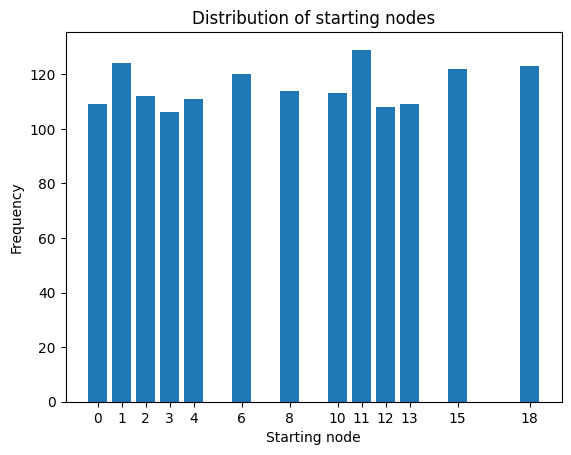

In [188]:
from collections import Counter

# Sort sequences based on their first element
sorted_sequences = sorted(sequences, key=lambda seq: seq[0])

# Count the frequency of each starting node
start_nodes = [seq[0] for seq in sorted_sequences]
node_counts = Counter(start_nodes)

# Count the frequency of each starting node
freq = Counter([seq[0] for seq in sorted_sequences])

# Get all possible first elements
possible_first_elements = sorted(set(seq[0] for seq in sorted_sequences))

# Create a bar chart with xticks for each possible first element
plt.bar(freq.keys(), freq.values())
plt.xlabel("Starting node")
plt.ylabel("Frequency")
plt.title("Distribution of starting nodes")
plt.xticks(possible_first_elements)

plt.show()

# Method 2

[0, 1, 2, 4, 3, 6, 8]


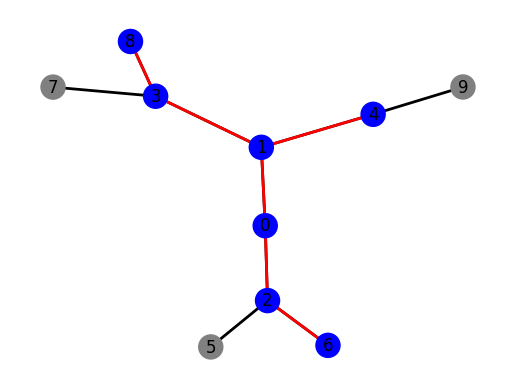

In [189]:
class Node:
    def __init__(self, value, children=None):
        self.value = value
        self.children = [] if children is None else children
        
def generate_random_spreading_tree(infected_nodes):
    # Select a random root node from the infected nodes
    root = random.choice(infected_nodes)

    nodes = [root]
    s_k = [root]
    #print(f"root is {root}")
    #print(f"nodes are {nodes}")

    # Generate the tree
    while len(nodes) < len(infected_nodes):
        candidate_parents = []
        for node in nodes:
          #node_neighbors = list(G.neighbors(node))
          for c in G.neighbors(node):
            if c in infected_nodes and c not in nodes:
              candidate_parents.append(c) 
        parent = random.choice(candidate_parents) # Select a random parent node
        #print(f"parent is {parent}")
        nodes.append(parent)
        s_k.append(parent)

        #children = [c for c in G.neighbors(parent) if c in infected_nodes and c not in nodes] # Select the children that are infected and haven't been added yet
        #print(f"children are {children}")
        #if len(children) > 0:
          #child = random.choice(children) # Select a random child
          #parent.children.append(child) # Add the child to the parent's children list
          #nodes.append(parent)
          #nodes.append(child) # Add the child to the list of nodes
    # Create the graph
    return s_k


# Define the original graph
G = nx.Graph()
G.add_nodes_from(range(10))
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9)])

# Define the infected nodes
infected_nodes = [0, 1, 2, 3, 4, 6, 8]

# Generate the spreading tree
s_k = generate_random_spreading_tree(infected_nodes)
print(s_k)
# Set the node colors
node_colors = ['blue' if i in infected_nodes else 'gray' for i in range(10)]

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=300)
nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in range(10)}, font_size=12)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_edges(tree, pos, edgelist=edges, width=2, edge_color='red')
plt.axis('off')
plt.show()


In [190]:
## repeat the growing process 10000 times
# use Monte Carlo method to sample the edges or permutations by 10000 samples
def permutations_count(infected_nodes, iterations):
    trees = []
    permutations = []
    counts = defaultdict(int)
    for i in range(iterations):
        s_k = generate_random_spreading_tree(infected_nodes)
        permutations.append(s_k)
        #counts[tuple(sorted(edges))] += 1
    return permutations#, counts

In [191]:
infected_nodes = [0, 1, 2, 3, 4, 6, 8]
permutations = permutations_count(infected_nodes, iterations = 1000)
print(permutations[:10])
#print(len(s_k))
#print(counts)

[[1, 4, 0, 3, 2, 6, 8], [8, 3, 1, 4, 0, 2, 6], [1, 3, 0, 2, 6, 4, 8], [4, 1, 3, 8, 0, 2, 6], [2, 6, 0, 1, 3, 8, 4], [4, 1, 0, 3, 8, 2, 6], [8, 3, 1, 4, 0, 2, 6], [1, 0, 3, 4, 8, 2, 6], [8, 3, 1, 0, 4, 2, 6], [8, 3, 1, 0, 2, 4, 6]]


In [192]:
# Convert the list of edges into a tuple of tuples
permutations_tuples = tuple(map(tuple, permutations))

# Count the frequency of each sublist
permutations_counter = Counter(permutations_tuples)

# Print the frequency of each sublist
for sublist, count in permutations_counter.items():
    print(sublist, count)


(1, 4, 0, 3, 2, 6, 8) 2
(8, 3, 1, 4, 0, 2, 6) 75
(1, 3, 0, 2, 6, 4, 8) 2
(4, 1, 3, 8, 0, 2, 6) 45
(2, 6, 0, 1, 3, 8, 4) 14
(4, 1, 0, 3, 8, 2, 6) 18
(1, 0, 3, 4, 8, 2, 6) 3
(8, 3, 1, 0, 4, 2, 6) 29
(8, 3, 1, 0, 2, 4, 6) 23
(6, 2, 0, 1, 3, 8, 4) 23
(1, 4, 3, 0, 8, 2, 6) 7
(1, 4, 0, 2, 3, 8, 6) 3
(2, 6, 0, 1, 3, 4, 8) 23
(6, 2, 0, 1, 4, 3, 8) 60
(1, 4, 0, 2, 6, 3, 8) 4
(1, 4, 3, 8, 0, 2, 6) 12
(3, 1, 8, 4, 0, 2, 6) 9
(1, 3, 0, 8, 4, 2, 6) 3
(3, 8, 1, 0, 2, 6, 4) 9
(0, 1, 4, 2, 6, 3, 8) 11
(1, 3, 8, 0, 4, 2, 6) 6
(1, 0, 2, 3, 8, 4, 6) 1
(1, 3, 4, 0, 2, 6, 8) 2
(1, 4, 0, 3, 2, 8, 6) 5
(4, 1, 3, 0, 8, 2, 6) 17
(2, 6, 0, 1, 4, 3, 8) 34
(3, 8, 1, 4, 0, 2, 6) 36
(3, 8, 1, 0, 4, 2, 6) 17
(4, 1, 0, 2, 3, 6, 8) 6
(3, 1, 0, 8, 4, 2, 6) 5
(2, 0, 6, 1, 3, 4, 8) 12
(1, 3, 0, 4, 8, 2, 6) 4
(4, 1, 0, 3, 2, 8, 6) 16
(0, 2, 1, 6, 3, 4, 8) 4
(6, 2, 0, 1, 3, 4, 8) 32
(2, 0, 1, 6, 4, 3, 8) 6
(3, 1, 8, 0, 2, 6, 4) 1
(0, 2, 1, 4, 6, 3, 8) 8
(3, 1, 0, 4, 8, 2, 6) 3
(4, 1, 0, 3, 2, 6, 8) 12
(0, 1, 3, 8, 4, 2, 6)

In [193]:
permutations_counter.most_common()

[((8, 3, 1, 4, 0, 2, 6), 75),
 ((6, 2, 0, 1, 4, 3, 8), 60),
 ((4, 1, 3, 8, 0, 2, 6), 45),
 ((3, 8, 1, 4, 0, 2, 6), 36),
 ((2, 6, 0, 1, 4, 3, 8), 34),
 ((6, 2, 0, 1, 3, 4, 8), 32),
 ((8, 3, 1, 0, 4, 2, 6), 29),
 ((8, 3, 1, 0, 2, 4, 6), 23),
 ((6, 2, 0, 1, 3, 8, 4), 23),
 ((2, 6, 0, 1, 3, 4, 8), 23),
 ((8, 3, 1, 0, 2, 6, 4), 20),
 ((4, 1, 0, 3, 8, 2, 6), 18),
 ((0, 2, 6, 1, 4, 3, 8), 18),
 ((4, 1, 3, 0, 8, 2, 6), 17),
 ((3, 8, 1, 0, 4, 2, 6), 17),
 ((2, 0, 6, 1, 4, 3, 8), 17),
 ((4, 1, 0, 3, 2, 8, 6), 16),
 ((4, 1, 0, 2, 6, 3, 8), 16),
 ((2, 6, 0, 1, 3, 8, 4), 14),
 ((0, 2, 6, 1, 3, 4, 8), 13),
 ((1, 4, 3, 8, 0, 2, 6), 12),
 ((2, 0, 6, 1, 3, 4, 8), 12),
 ((4, 1, 0, 3, 2, 6, 8), 12),
 ((1, 3, 8, 4, 0, 2, 6), 12),
 ((0, 1, 4, 2, 6, 3, 8), 11),
 ((4, 1, 0, 2, 3, 8, 6), 11),
 ((4, 1, 3, 0, 2, 6, 8), 10),
 ((3, 8, 1, 0, 2, 4, 6), 10),
 ((3, 1, 4, 8, 0, 2, 6), 10),
 ((3, 1, 8, 4, 0, 2, 6), 9),
 ((3, 8, 1, 0, 2, 6, 4), 9),
 ((2, 0, 6, 1, 3, 8, 4), 9),
 ((0, 2, 6, 1, 3, 8, 4), 9),
 ((0, 2, 1, 4,

## New Tree

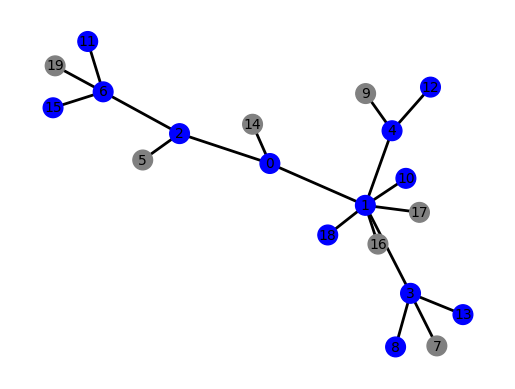

In [194]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty tree graph
G = nx.Graph()

# Add 20 nodes to the graph
G.add_nodes_from(range(20))

# Connect the nodes in a tree structure
G.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (2, 6), (3, 7), (3, 8), (4, 9), (1, 10), (6, 11), (4,12), (3, 13), (0, 14), (6,15), (1, 16), (1, 17), (1,18), (6, 19)])

# Set the node colors
node_colors = ['blue' if i in [0,1,2,3,4, 6, 8, 10, 11, 12, 13, 15, 18] else 'gray' for i in range(20)]

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200)
nx.draw_networkx_labels(G, pos, labels={i: str(i) for i in range(20)}, font_size=10)
nx.draw_networkx_edges(G, pos, width=2)
plt.axis('off')
plt.show()

In [195]:
## repeat the growing process 10000 times
# use Monte Carlo method to sample the edges or permutations by 10000 samples
def permutations_count(infected_nodes, iterations):
    trees = []
    permutations = []
    counts = defaultdict(int)
    for i in range(iterations):
        s_k = generate_random_spreading_tree(infected_nodes)
        permutations.append(s_k)
        #counts[tuple(sorted(edges))] += 1
    return permutations#, counts

In [196]:
infected_nodes = [0, 1, 2, 3, 4, 6, 8]
permutations = permutations_count(infected_nodes, iterations = 1000)
print(permutations[:10])
#print(len(s_k))
#print(counts)

[[8, 3, 1, 0, 4, 2, 6], [6, 2, 0, 1, 3, 8, 4], [2, 0, 1, 4, 3, 6, 8], [1, 4, 0, 2, 3, 6, 8], [6, 2, 0, 1, 3, 8, 4], [3, 1, 8, 0, 4, 2, 6], [4, 1, 0, 2, 3, 8, 6], [8, 3, 1, 4, 0, 2, 6], [6, 2, 0, 1, 4, 3, 8], [6, 2, 0, 1, 3, 4, 8]]


In [197]:
# Convert the list of edges into a tuple of tuples
permutations_tuples = tuple(map(tuple, permutations))

# Count the frequency of each sublist
permutations_counter = Counter(permutations_tuples)

# Print the frequency of each sublist
for sublist, count in permutations_counter.items():
    print(sublist, count)

(8, 3, 1, 0, 4, 2, 6) 34
(6, 2, 0, 1, 3, 8, 4) 40
(2, 0, 1, 4, 3, 6, 8) 3
(1, 4, 0, 2, 3, 6, 8) 1
(3, 1, 8, 0, 4, 2, 6) 6
(4, 1, 0, 2, 3, 8, 6) 7
(8, 3, 1, 4, 0, 2, 6) 71
(6, 2, 0, 1, 4, 3, 8) 68
(6, 2, 0, 1, 3, 4, 8) 36
(1, 0, 2, 6, 3, 8, 4) 4
(0, 1, 3, 4, 2, 8, 6) 3
(4, 1, 0, 2, 6, 3, 8) 20
(0, 1, 3, 2, 4, 6, 8) 5
(4, 1, 0, 3, 8, 2, 6) 24
(0, 2, 6, 1, 3, 8, 4) 17
(1, 0, 2, 6, 4, 3, 8) 2
(3, 1, 8, 0, 2, 4, 6) 2
(3, 1, 8, 4, 0, 2, 6) 18
(8, 3, 1, 0, 2, 6, 4) 21
(2, 6, 0, 1, 4, 3, 8) 41
(0, 2, 1, 3, 4, 6, 8) 1
(3, 1, 0, 2, 4, 8, 6) 2
(1, 3, 8, 0, 2, 6, 4) 2
(2, 6, 0, 1, 3, 8, 4) 12
(4, 1, 3, 0, 8, 2, 6) 25
(4, 1, 3, 8, 0, 2, 6) 28
(1, 0, 3, 8, 2, 6, 4) 3
(3, 1, 8, 0, 2, 6, 4) 4
(3, 8, 1, 4, 0, 2, 6) 34
(3, 8, 1, 0, 2, 6, 4) 9
(1, 0, 4, 2, 3, 8, 6) 4
(1, 0, 3, 4, 2, 8, 6) 3
(0, 1, 2, 6, 4, 3, 8) 3
(0, 1, 3, 4, 8, 2, 6) 5
(1, 4, 3, 8, 0, 2, 6) 13
(3, 1, 4, 8, 0, 2, 6) 8
(4, 1, 3, 0, 2, 8, 6) 8
(3, 1, 4, 0, 8, 2, 6) 6
(1, 0, 2, 4, 3, 8, 6) 2
(1, 3, 0, 2, 6, 4, 8) 1
(0, 1, 4, 3, 2, 6, 8) 6


In [198]:
permutations_counter.most_common()

[((8, 3, 1, 4, 0, 2, 6), 71),
 ((6, 2, 0, 1, 4, 3, 8), 68),
 ((2, 6, 0, 1, 4, 3, 8), 41),
 ((6, 2, 0, 1, 3, 8, 4), 40),
 ((6, 2, 0, 1, 3, 4, 8), 36),
 ((8, 3, 1, 0, 4, 2, 6), 34),
 ((3, 8, 1, 4, 0, 2, 6), 34),
 ((4, 1, 3, 8, 0, 2, 6), 28),
 ((4, 1, 3, 0, 8, 2, 6), 25),
 ((4, 1, 0, 3, 8, 2, 6), 24),
 ((8, 3, 1, 0, 2, 6, 4), 21),
 ((4, 1, 0, 2, 6, 3, 8), 20),
 ((2, 6, 0, 1, 3, 4, 8), 19),
 ((3, 1, 8, 4, 0, 2, 6), 18),
 ((0, 2, 6, 1, 3, 8, 4), 17),
 ((0, 2, 6, 1, 4, 3, 8), 16),
 ((3, 8, 1, 0, 4, 2, 6), 14),
 ((2, 0, 6, 1, 3, 8, 4), 14),
 ((2, 0, 6, 1, 4, 3, 8), 14),
 ((8, 3, 1, 0, 2, 4, 6), 14),
 ((1, 4, 3, 8, 0, 2, 6), 13),
 ((2, 6, 0, 1, 3, 8, 4), 12),
 ((0, 2, 6, 1, 3, 4, 8), 11),
 ((1, 3, 4, 8, 0, 2, 6), 10),
 ((4, 1, 3, 0, 2, 6, 8), 10),
 ((3, 8, 1, 0, 2, 6, 4), 9),
 ((0, 2, 1, 6, 4, 3, 8), 9),
 ((0, 2, 1, 4, 6, 3, 8), 9),
 ((3, 1, 4, 8, 0, 2, 6), 8),
 ((4, 1, 3, 0, 2, 8, 6), 8),
 ((2, 0, 6, 1, 3, 4, 8), 8),
 ((0, 1, 4, 2, 6, 3, 8), 8),
 ((4, 1, 0, 2, 3, 8, 6), 7),
 ((0, 1, 3, 8, 4, 

# Next Step

Compute probability for each permutation using equation from Devavrat Shah

$$
\mathbf{P}(\sigma \mid v)=\prod_{k=2}^N \frac{1}{d_1(\sigma)+\sum_{i=2}^k\left(d_i(\sigma)-2\right)}
$$